In [1]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 
from cloudmesh.common.systeminfo import systeminfo
import ipywidgets as widgets
from collections import OrderedDict

sns.set_theme(style="whitegrid")

In [2]:
data = OrderedDict()

In [3]:
a =  [("gregor", "alienware", 4), 
      ("gregor", "alienware", 8),
      ("gregor", "alienware", 16),
      ("gregor", "alienware", 32)]
i5 = [
#    ("gregor", "i5", 1), 
    ("gregor", "i5", 2), 
    ("gregor", "i5", 3), 
    ("gregor", "i5", 4), 
      ("gregor", "i5", 5),
      ("gregor", "i5", 6),
      ("gregor", "i5", 7),
      ("gregor", "i5", 8),
      ("gregor", "i5", 9),
      ("gregor", "i5", 10),
      ("gregor", "i5", 11),
      ("gregor", "i5", 12)]

for user, node, processors in i5:

    label = f"{user}-{node}-{processors}"
    output = f"benchmark/{user}"

    df = pd.read_pickle(f"{output}/{label}-df.pkl")
    display(df)
    row = list(df.iloc[[-1]].values[0])
    print (processors, row)
    data[str(processors)] = row

Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
32,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5120000,2.772,2.913,2.783,2.768,2.757,2.753,2.767,2.784,2.824,2.770
10240000,5.546,5.500,5.490,5.635,5.558,5.563,5.537,5.567,5.495,5.691
15360000,8.332,8.292,8.269,8.229,8.418,8.202,8.216,8.233,8.249,8.217
20480000,11.181,11.342,11.294,10.935,11.130,10.937,11.011,11.072,10.977,11.189
25600000,13.983,13.923,13.773,13.642,13.888,13.650,13.898,13.709,14.076,14.047
30720000,16.777,16.501,16.766,16.655,16.670,16.601,16.741,16.588,16.792,16.549
35840000,19.362,19.659,19.183,19.616,19.494,19.335,19.783,19.112,19.337,20.062
40960000,22.143,22.511,22.324,22.223,22.519,22.458,22.372,22.020,22.211,21.758


2 [25.413, 25.174, 24.997, 24.973, 24.637, 24.886, 24.694, 24.866, 25.302, 25.234]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
21,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.002,0.002,0.001
3413333,1.900,1.873,1.919,1.857,1.851,1.869,1.853,1.849,1.855,1.872
6826666,3.718,3.789,3.712,3.778,3.702,3.723,3.734,3.711,3.753,3.764
10240000,5.578,5.688,5.640,5.596,5.544,5.617,5.637,5.588,5.580,5.644
13653333,7.423,7.483,7.442,7.470,7.360,7.412,7.412,7.445,7.520,7.416
17066666,9.374,9.252,9.539,9.255,9.369,9.289,9.288,9.398,9.346,9.496
20480000,11.165,11.175,11.064,11.092,11.660,11.263,11.234,11.314,11.208,11.314
23893333,13.265,13.132,13.002,13.064,13.088,13.303,13.121,13.224,12.929,13.086
27306666,15.020,15.533,14.925,14.878,14.950,15.218,14.978,14.918,14.933,15.123


3 [16.784, 16.736, 16.878, 16.803, 17.086, 16.695, 16.979, 16.823, 17.013, 16.803]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
16,0.001,0.001,0.000,0.000,0.000,0.001,0.002,0.000,0.002,0.001
2560000,1.407,1.452,1.440,1.466,1.422,1.428,1.411,1.433,1.409,1.413
5120000,2.815,2.851,2.800,2.824,2.802,2.876,2.815,2.910,2.876,2.803
7680000,4.339,4.301,4.228,4.223,4.245,4.234,4.419,4.305,4.300,4.216
10240000,5.663,5.658,5.674,5.635,5.654,5.652,5.780,5.819,5.702,5.591
12800000,7.018,7.062,7.112,7.131,7.259,7.085,7.200,7.073,7.000,7.054
15360000,8.523,8.569,8.479,8.423,8.480,8.521,8.497,8.513,8.439,8.429
17920000,9.843,9.788,10.073,10.031,9.884,9.960,10.219,9.739,9.971,9.840
20480000,11.120,11.306,11.386,11.289,11.283,11.191,11.228,11.181,11.309,11.525


4 [12.641, 12.642, 12.674, 13.274, 12.856, 13.009, 12.816, 12.736, 12.629, 12.565]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
12,0.001,0.001,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000
2048000,1.155,1.160,1.143,1.143,1.151,1.148,1.150,1.167,1.157,1.145
4096000,2.331,2.368,2.275,2.297,2.311,2.282,2.324,2.312,2.285,2.271
6144000,3.471,3.441,3.456,3.557,3.421,3.419,3.464,3.489,3.416,3.419
8192000,4.586,4.548,4.579,4.565,4.651,4.602,4.591,4.622,4.598,4.596
10240000,5.715,5.771,5.760,5.649,5.735,5.747,5.868,5.781,5.716,5.805
12288000,7.017,6.943,6.918,6.833,6.874,6.897,6.869,6.868,6.909,6.870
14336000,7.989,8.065,8.018,7.987,8.147,8.032,8.027,7.972,8.085,8.012
16384000,9.144,9.255,9.202,9.494,9.278,9.132,9.109,9.396,9.157,9.219


5 [10.693, 10.348, 10.315, 10.664, 10.177, 10.216, 10.279, 10.763, 10.356, 10.223]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
10,0.090,0.001,0.000,0.002,0.001,0.001,0.001,0.000,0.001,0.002
1706666,0.945,0.962,0.951,0.968,0.953,0.957,0.994,0.955,0.969,0.957
3413333,1.931,1.919,1.919,1.929,1.902,1.921,1.929,2.014,1.921,1.920
5120000,2.872,2.855,2.872,2.888,2.866,2.885,2.873,2.852,2.868,3.061
6826666,3.836,3.824,3.820,3.817,3.923,3.842,3.808,3.884,3.824,4.134
8533333,4.810,4.753,4.790,4.765,4.874,4.751,5.060,4.819,4.772,4.875
10240000,5.911,5.719,5.685,5.728,5.733,5.708,5.747,5.779,5.804,5.734
11946666,6.660,6.695,6.742,6.791,6.722,6.656,6.705,6.812,7.299,6.690
13653333,7.823,7.717,7.562,7.608,7.744,7.664,7.665,7.769,9.210,7.590


6 [8.578, 8.641, 8.571, 8.63, 8.516, 8.653, 8.593, 8.603, 8.925, 8.574]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.087,0.000
1462857,1.659,1.672,1.652,1.668,1.653,1.643,1.767,1.670,1.651,1.666
2925714,3.325,3.356,3.255,3.331,3.333,3.436,3.330,3.398,3.311,3.314
4388571,5.110,5.076,5.177,5.015,4.951,5.110,4.951,4.992,5.032,4.942
5851428,5.008,6.828,6.843,6.669,6.682,6.733,6.758,6.626,6.630,6.658
7314285,8.204,8.242,8.458,8.227,8.389,8.343,8.404,8.304,8.386,8.561
8777142,9.993,10.123,9.772,10.089,10.138,10.120,9.995,10.026,10.217,9.991
10240000,11.596,11.681,11.568,11.871,12.137,11.753,11.532,11.615,11.608,11.516
11702857,13.334,13.562,13.262,13.382,13.350,13.428,13.353,13.389,13.242,13.450


7 [14.897, 15.171, 14.669, 15.152, 14.91, 15.14, 14.983, 15.816, 15.117, 15.074]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
8,0.000,0.000,0.000,0.030,0.000,0.000,0.000,0.000,0.000,0.000
1280000,1.459,1.544,1.451,1.454,1.448,1.439,1.489,1.465,1.538,1.464
2560000,2.966,2.942,2.930,2.915,2.921,2.944,3.007,2.936,2.920,2.950
3840000,4.395,4.393,4.506,4.459,4.437,4.447,4.490,4.362,4.454,4.483
5120000,5.878,5.799,5.979,5.941,5.785,5.890,5.926,5.802,5.747,5.828
6400000,7.319,7.289,7.298,7.575,7.409,7.490,7.312,7.446,7.396,7.344
7680000,8.902,8.862,8.798,8.781,8.774,8.838,8.762,8.891,8.840,8.702
8960000,10.237,10.216,10.393,10.345,10.286,10.272,10.301,10.356,10.328,10.163
10240000,11.823,11.732,11.818,11.742,11.773,11.731,11.900,11.675,11.819,11.910


8 [13.202, 13.247, 13.073, 13.223, 13.104, 13.176, 13.283, 13.198, 13.319, 13.36]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
7,0.000,0.002,0.003,0.001,0.000,0.000,0.002,0.001,0.000,0.002
1137777,1.310,1.301,1.305,1.298,1.307,1.293,1.309,1.300,1.315,1.321
2275555,2.607,2.610,2.632,2.605,2.658,2.619,2.632,2.601,2.576,2.612
3413333,3.906,3.886,3.931,3.956,3.973,3.912,3.934,3.923,4.017,3.939
4551111,5.156,5.199,5.217,5.212,5.232,5.201,5.218,5.217,5.167,5.218
5688888,6.541,6.526,6.593,6.508,6.593,6.523,6.568,6.625,6.580,6.626
6826666,7.943,7.976,7.916,7.793,7.800,7.794,7.786,7.838,7.793,7.837
7964444,9.159,9.127,9.206,9.128,9.086,9.068,9.097,9.189,9.151,9.245
9102222,10.607,10.357,10.574,10.357,10.626,10.538,10.824,10.456,10.511,10.486


9 [11.632, 11.893, 11.836, 11.865, 11.711, 11.862, 11.622, 11.761, 11.752, 11.765]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
6,0.001,0.001,0.004,0.000,0.001,0.000,0.000,0.000,0.002,0.000
1024000,1.186,1.196,1.175,1.183,1.179,1.167,1.183,1.228,1.178,1.166
2048000,2.386,2.384,2.338,2.382,2.418,2.367,2.319,2.354,2.332,2.367
3072000,3.541,3.535,3.507,3.558,3.519,3.507,3.570,3.535,3.512,3.579
4096000,4.715,4.730,4.691,4.748,4.679,4.722,4.706,4.683,4.688,4.680
5120000,5.946,5.905,5.927,5.984,5.874,5.855,6.120,5.907,5.866,5.829
6144000,7.135,7.038,7.039,7.021,7.043,7.235,7.078,7.116,7.103,7.161
7168000,8.230,8.138,8.321,8.205,8.197,8.283,8.297,8.172,8.321,8.294
8192000,9.492,9.533,9.311,9.416,9.386,9.446,9.404,9.404,9.469,9.542


10 [10.618, 10.546, 10.751, 10.727, 10.557, 10.6, 10.725, 10.761, 10.61, 10.61]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
5,0.001,0.000,0.003,0.001,0.000,0.000,0.001,0.000,0.001,0.002
930909,1.075,1.092,1.093,1.060,1.077,1.083,1.120,1.073,1.078,1.083
1861818,2.155,2.152,2.149,2.133,2.183,2.131,2.158,2.146,2.164,2.141
2792727,3.194,3.242,3.239,3.219,3.210,3.207,3.238,3.239,3.230,3.217
3723636,4.252,4.321,4.302,4.312,4.307,4.280,4.304,4.303,4.288,4.308
4654545,5.358,5.311,5.366,5.409,5.352,5.440,5.370,5.374,5.339,5.419
5585454,6.478,6.512,6.473,6.476,6.467,6.540,6.440,6.440,6.490,6.464
6516363,7.556,7.494,7.548,7.517,7.508,7.512,7.526,7.445,7.523,7.625
7447272,8.537,8.670,8.501,8.612,8.665,8.642,8.611,8.556,8.651,8.633


11 [9.602, 9.725, 9.639, 9.685, 9.6, 9.685, 9.703, 9.606, 9.699, 9.625]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
5,0.001,0.002,0.000,0.000,0.001,0.001,0.001,0.006,0.000,0.001
853333,0.987,0.993,0.986,0.996,0.983,1.000,1.006,0.980,0.983,0.992
1706666,1.979,2.041,1.965,1.975,1.963,1.980,1.986,1.960,1.973,1.960
2560000,2.946,2.971,2.951,2.970,2.994,2.979,2.979,2.965,2.962,2.980
3413333,3.992,3.963,3.982,3.954,3.964,4.005,3.965,3.951,3.942,3.928
4266666,4.917,4.933,4.910,4.990,4.952,4.957,4.977,4.959,4.926,4.941
5120000,5.910,5.961,5.902,6.003,5.951,5.937,5.918,5.886,5.932,5.911
5973333,6.891,7.095,6.916,6.979,6.925,7.008,6.954,6.963,6.867,6.963
6826666,7.902,7.921,7.968,7.900,7.901,7.943,7.899,7.942,7.979,7.868


12 [8.896, 8.92, 8.887, 8.997, 8.881, 8.951, 8.951, 8.917, 8.871, 9.054]


In [4]:
result = pd.DataFrame(data)
result.index.name = "Trial"
result

,2,3,4,5,6,7,8,9,10,11,12
Trial,,,,,,,,,,,
0,25.413,16.784,12.641,10.693,8.578,14.897,13.202,11.632,10.618,9.602,8.896
1,25.174,16.736,12.642,10.348,8.641,15.171,13.247,11.893,10.546,9.725,8.920
2,24.997,16.878,12.674,10.315,8.571,14.669,13.073,11.836,10.751,9.639,8.887
3,24.973,16.803,13.274,10.664,8.630,15.152,13.223,11.865,10.727,9.685,8.997
4,24.637,17.086,12.856,10.177,8.516,14.910,13.104,11.711,10.557,9.600,8.881
5,24.886,16.695,13.009,10.216,8.653,15.140,13.176,11.862,10.600,9.685,8.951
6,24.694,16.979,12.816,10.279,8.593,14.983,13.283,11.622,10.725,9.703,8.951
7,24.866,16.823,12.736,10.763,8.603,15.816,13.198,11.761,10.761,9.606,8.917
8,25.302,17.013,12.629,10.356,8.925,15.117,13.319,11.752,10.610,9.699,8.871


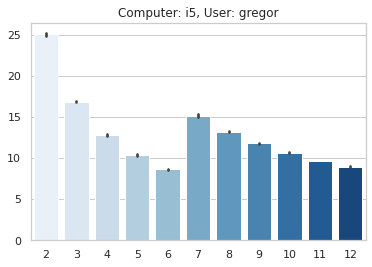

In [5]:
#sns.boxplot(data=result);
#sns.swarmplot(data=result);
sns.barplot(data=result, palette="Blues").set_title(f'Computer: {node}, User: {user}');



In [6]:
result.describe()

,2,3,4,5,6,7,8,9,10,11,12
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,25.017600,16.860000,12.784200,10.40340,8.628400,15.092900,13.218500,11.769900,10.650500,9.656900,8.932500
std,0.258371,0.127023,0.217034,0.21823,0.111587,0.297997,0.089377,0.095355,0.081828,0.047487,0.057581
min,24.637000,16.695000,12.565000,10.17700,8.516000,14.669000,13.073000,11.622000,10.546000,9.600000,8.871000
25%,24.871000,16.788750,12.641250,10.23700,8.575000,14.928250,13.181500,11.721250,10.602500,9.610750,8.889250
50%,24.985000,16.813000,12.705000,10.33150,8.598000,15.095500,13.212500,11.763000,10.614000,9.662000,8.918500
75%,25.219000,16.953750,12.846000,10.58700,8.638250,15.149000,13.274000,11.855500,10.726500,9.695500,8.951000
max,25.413000,17.086000,13.274000,10.76300,8.925000,15.816000,13.360000,11.893000,10.761000,9.725000,9.054000


In [7]:
df_line = pd.DataFrame({
    "Processors": list(result.columns),
    "Time in s": list(result.describe(include='all').loc['mean'])           
                 })
df_line["Processors"] = pd.to_numeric(df_line["Processors"])


In [8]:
df_line["Sum"] = df_line["Time in s"] * df_line["Processors"]
df_line

,Processors,Time in s,Sum
0,2,25.0176,50.0352
1,3,16.8600,50.5800
2,4,12.7842,51.1368
3,5,10.4034,52.0170
4,6,8.6284,51.7704
5,7,15.0929,105.6503
6,8,13.2185,105.7480
7,9,11.7699,105.9291
8,10,10.6505,106.5050
9,11,9.6569,106.2259


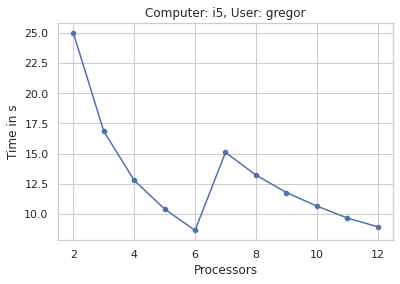

In [9]:
sns.scatterplot(data=df_line, x="Processors", y="Time in s");
sns.lineplot(data=df_line, x="Processors", y="Time in s").set_title(f'Computer: {node}, User: {user}');